<a href="https://www.youtube.com/@GovindPrakash">
  <img width="100%" src="https://github.com/Govind-Prakash/DeepLearning/blob/main/Media/Object%20Detection.jpg?raw=true">
</a>

## Importing all Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

2024-12-01 21:07:11.824989: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 21:07:12.106718: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-01 21:07:12.298084: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733067432.487708   19171 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733067432.549883   19171 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 21:07:13.086190: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

## Load CIFAR-10 data set

In [18]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

## Normalise pixel values to be between 0 and 1

In [19]:
train_images, test_images= train_images/255.0, test_images/255.0

## Class names in CIFAR-10 

In [20]:
class_names= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## Plot some sample images from the dataset

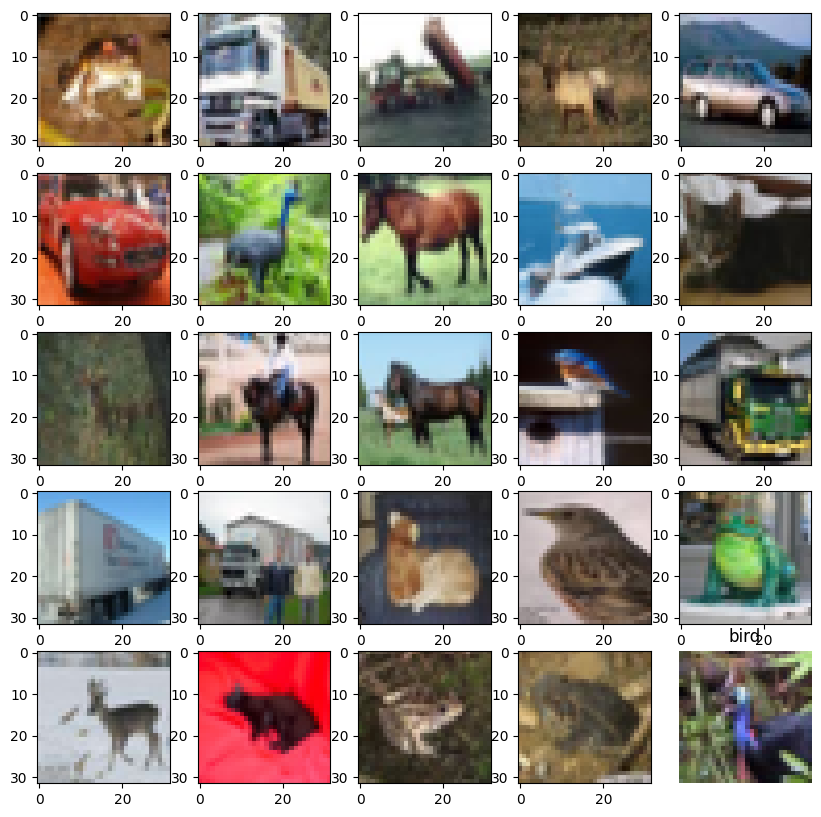

In [21]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5, i+1)
    plt.imshow(train_images[i])

plt.title(class_names[train_labels[i][0]])
plt.axis('off')
plt.show()

## Create a conolutional neural Network (CNN)

In [22]:
model= models.Sequential([
    #First convolutional layer
    layers.Conv2D(32, (3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    #Second Convolutional layer
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Third Convolution layer
    layers.Conv2D(64, (3,3),activation='relu'),

    #Flatten layer to convert @D matrices into 1D vector
    layers.Flatten(),

    #Fully conneted layer
    layers.Dense(64,activation='relu'),

    #Output layer: 10 Nurons (one for each class)
    layers.Dense(10)
])

/home/govind/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1733065995.049719   17240 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Summary of the model 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

## Train the model

In [1]:
history=model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

NameError: name 'model' is not defined

## Evaluate the Model

In [11]:
test_loss, test_acc=model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc}")

NameError: name 'model' is not defined

## Plot training and validation accuracy

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

NameError: name 'plt' is not defined

## Pot training and validation loss

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

NameError: name 'plt' is not defined

## Make Prediction

In [14]:
predictions=model.predict(test_images)

NameError: name 'model' is not defined

## Get the predicted label for the first image

In [15]:
predicted_label= np.argmax(predictions[0])

NameError: name 'predictions' is not defined

# Display the image and predicted label

In [16]:
plt.imshow(test_images[0])
plt.title(f"Predictd Label: {class_names[predicted_label]}")
plt.axis('off')
plt.show()

NameError: name 'plt' is not defined